In [1]:
import numpy as np
import mesa
from model import HumanitarianLogistics, COA, AZC, Newcomer
from Values import Values
import matplotlib.pyplot as plt

In [2]:
#initial config
width = 200
height = 200
num_pols = 2
city_size = 20
number_steps = 300


In [3]:
#helper functions
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

## Action: Consolidate
## Metric: Occupancy Concrentration accross AZCs
#### Reasoning
Concentrating newcomers in fewer facilities costs less in maitenance. Freeing up resources for other purposes. 

14
14
14
14
14
14
14
14
14
14
14
14


/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/phillip/anaconda3/envs/port/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over


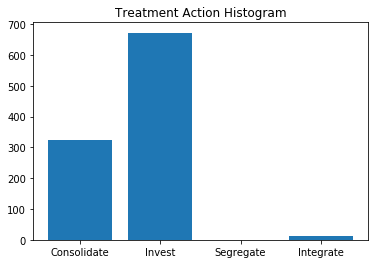

14
14
14
14
14
14
14
14
14
14
14
14
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over


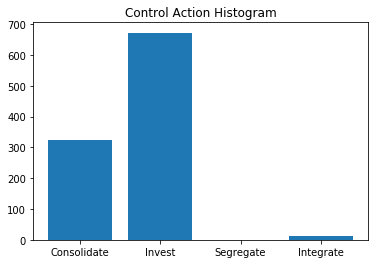

In [13]:
test = HumanitarianLogistics(width, height, num_pols, city_size)

#treatment
treatment = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC']

data = np.zeros(shape = (number_steps, len(treatment)))

for x in treatment:
    x.self_enhancement = 80
    x.self_transcendence = 50    
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    x.action_frequency = x.assessment_frequency
    print(x.checkin_frequency)

    
for step in range(0,number_steps):
    test.step()
    treatment_data = []
    for azc in treatment:
        total_nc = float(len([nc for nc in test.schedule.agents if 
                          type(nc) is Newcomer]))
        treatment_data.append(azc.occupancy)
    
    data[step,0] = gini(np.array(treatment_data,dtype='float'))

names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()
    
    
#init new model    
test = HumanitarianLogistics(width, height, num_pols, city_size)    
#control
control = [azc for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC']

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    x.action_frequency = x.assessment_frequency
    print(x.checkin_frequency)
    
for step in range(0,number_steps):
    test.step()
    control_data = []
    for azc in control:
        total_nc = float(len([nc for nc in test.schedule.agents if 
                          type(nc) is Newcomer]))
        control_data.append(azc.occupancy)
    
    data[step,1] = gini(np.array(control_data, dtype = 'float'))
    
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()
    
    
    


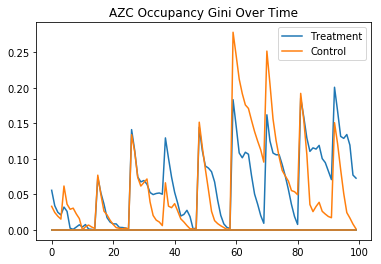

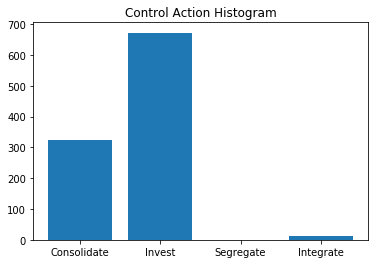

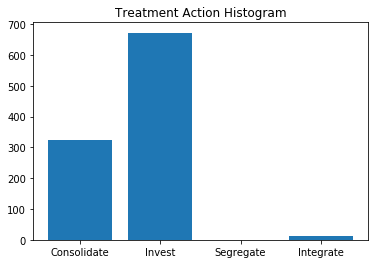

In [12]:
plt.plot(data[150:250,:])
plt.legend(['Treatment', 'Control'])
plt.title('AZC Occupancy Gini Over Time')
plt.show()
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.city.coa.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()

## Action: Invest
## Metric: Avg Newcomer Health

In [6]:
#treatment
treatment = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == False]

for x in treatment:
    x.self_enhancement = 80
    x.self_transcendence = 50   
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))

#control
control = [azc.coa for azc in test.schedule.agents if
       type(azc) is AZC and azc.modality == 'AZC' and
       azc.unique_id % 2 == True]

for x in control:
    x.self_enhancement = 50
    x.self_transcendence = 50  
    x.conservatism = 50
    x.openness_to_change = 50
    x.values = Values(10, x.self_enhancement, x.self_transcendence,
                         x.conservatism, x.openness_to_change,x)
    
    x.assessment_frequency = int(365/(x.openness_to_change*52/100))
    x.action_frequency = x.assessment_frequency
    x.staff = x.self_transcendence
    x.checkin_frequency =  int(365/(x.staff*52/100))
    
data = np.zeros(shape = (number_steps, 2))

In [7]:
for step in range(0,number_steps):
    test.step()
    treatment_data = []
    for azc in treatment:
        for newcomer in azc.city.azc.occupants:
            treatment_data.append(newcomer.values.health)
    control_data = []
    for azc in control:
        for newcomer in azc.city.azc.occupants:
            control_data.append(newcomer.values.health)
    data[step,0] = np.mean(treatment_data)
    data[step,1] = np.mean(control_data)
    
    

shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over
shock-over


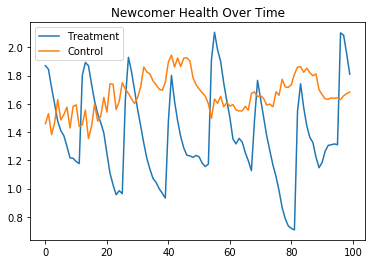

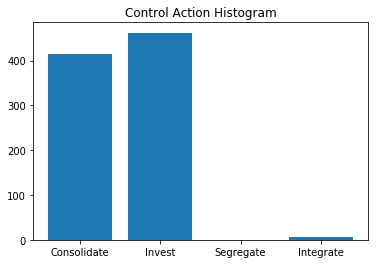

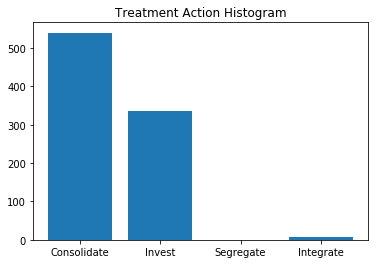

In [8]:
plt.plot(data[150:250,:])
plt.legend(['Treatment', 'Control'])
plt.title('Newcomer Health Over Time')
plt.show()
names = ['Consolidate', 'Invest', 'Segregate', 'Integrate']
hist = {name:0 for name in names}


for c in control:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Control Action Histogram')
plt.show()

hist = {name:0 for name in names}

for c in treatment:
    for name in names:
        for act in c.actions:
            if act.name == name:
                hist[name] += act.counter
plt.bar(hist.keys(), hist.values())
plt.title('Treatment Action Histogram')
plt.show()

In [9]:
7 % 0


ZeroDivisionError: integer division or modulo by zero